# Simple SVM

status: optimal_inaccurate
optimal value 1432.2613457287928
optimal var w = [[-45.64389664]
 [-27.94919303]], b = 64.79664218377417
---------- (300, 2)
---------- (2, 1) (59228, 2)


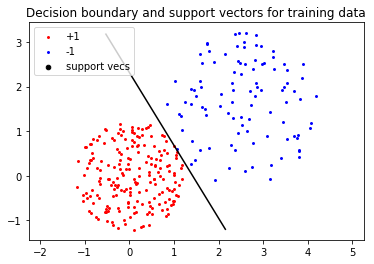

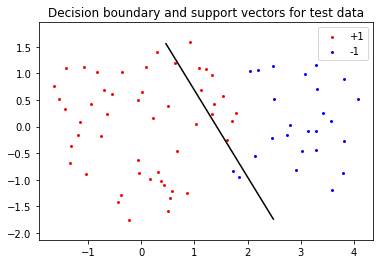

In [2]:
# ECS271 2019S
# Toy example of Linear SVM
# 4/16/2019
# To run this code, please first install cvxpy from https://www.cvxpy.org/

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import cvxpy as cp


# generate toy training data 
N1 = 200 # number of positive instances
N2 = 100 # number of negative instances
D = 2 # feature dimension
eps = 1e-8 # select support vectors
random.seed(1) # For reproducibility
r1 = np.sqrt(1.5*np.random.rand(N1,1)) # Radius
t1 = 2*np.pi*np.random.rand(N1,1)  # Angle
data1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(3*np.random.rand(N2,1)) # Radius
t2 = 2*np.pi*np.random.rand(N2,1)      # Angle
data2 = np.concatenate((2.5+r2*np.cos(t2), 1.5+r2*np.sin(t2)), axis=1) # points
## generate toy testing data
Nt1 = 50 # number of positive instances
Nt2 = 25 # number of negative instances
D = 2 # feature dimension
random.seed(1) # For reproducibility
r1 = np.sqrt(3.4*np.random.rand(Nt1,1)) # Radius
t1 = 2*np.pi*np.random.rand(Nt1,1)  # Angle
testdata1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(2.4*np.random.rand(Nt2,1)) # Radius
t2 = 2*np.pi*np.random.rand(Nt2,1)      # Angle
testdata2 = np.concatenate((3+r2*np.cos(t2), r2*np.sin(t2)), axis=1) # points
## training linear SVM based on CVX optimizer
X = np.concatenate((data1, data2), axis=0)
y = np.concatenate((np.ones((N1, 1)), - np.ones((N2, 1))), axis=0)

w = cp.Variable((D, 1))
b = cp.Variable()
objective = cp.Minimize(cp.sum(cp.square(w)) * 0.5)
constraints = [cp.multiply(y, (X @ w + b)) >= 1]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var w = {}, b = {}".format(w.value, b.value))


## visualize decision boundary for training data
d = 0.02
print('----------', X.shape)
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), d)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), d)
x1Grid, x2Grid = np.meshgrid(x1, x2)
xGrid = np.stack((x1Grid.flatten('F'), x2Grid.flatten('F')), axis=1)
print('----------', w.shape, xGrid.shape)
scores1 = xGrid.dot(w.value) + b.value
scores2 = -xGrid.dot(w.value) - b.value
plt.figure(0)
sup = y*(X.dot(w.value)+b.value)-1
sup_v1 = ((-eps<sup) & (sup<eps)).flatten()
h3 = plt.scatter(X[sup_v1,0], X[sup_v1,1], s=21, marker='o', c='k')
h1 = plt.scatter(data1[:,0], data1[:,1], s=15, marker='.', c='r')
h2 = plt.scatter(data2[:,0], data2[:,1], s=15, marker='.', c='b')
plt.contour(x1Grid, x2Grid, np.reshape(scores1, x1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for training data')
plt.legend((h1, h2, h3),('+1','-1', 'support vecs'))
plt.savefig('simpleSVM_train_decision_1.png')

time.sleep(2)
## visualize decision boundary for test data
Xt = np.concatenate((testdata1, testdata2), axis=0)
yt = np.concatenate((np.ones((Nt1, 1)), - np.ones((Nt2, 1))), axis=0)
xt1 = np.arange(np.min(Xt[:,0]), np.max(Xt[:,0]), d)
xt2 = np.arange(np.min(Xt[:,1]), np.max(Xt[:,1]), d)
xt1Grid, xt2Grid = np.meshgrid(xt1, xt2)
xtGrid = np.stack((xt1Grid.flatten('F'), xt2Grid.flatten('F')), axis=1)
test_scores1 = xtGrid.dot(w.value) + b.value
test_scores2 = -xtGrid.dot(w.value) - b.value
plt.figure(1)
ht1 = plt.scatter(testdata1[:,0], testdata1[:,1], s=15, marker='.', c='r')
ht2 = plt.scatter(testdata2[:,0], testdata2[:,1], s=15, marker='.', c='b')
plt.contour(xt1Grid, xt2Grid, np.reshape(test_scores1, xt1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for test data')
plt.legend((ht1, ht2),('+1','-1'))
plt.savefig('simpleSVM_test_decision_1.png')
plt.show()

# Transfer SVM

In [1]:
# ECS271 2019S
# Toy example of Linear SVM
# 4/16/2019
# To run this code, please first install cvxpy from https://www.cvxpy.org/

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import cvxpy as cp

## generate toy training data 
N1 = 200 # number of positive instances
N2 = 100 # number of negative instances
D = 2 # feature dimension
eps = 1e-8 # select support vectors
random.seed(1) # For reproducibility
r1 = np.sqrt(1.5*np.random.rand(N1,1)) # Radius
t1 = 2*np.pi*np.random.rand(N1,1)  # Angle
data1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(3*np.random.rand(N2,1)) # Radius
t2 = 2*np.pi*np.random.rand(N2,1)      # Angle
data2 = np.concatenate((2.5+r2*np.cos(t2), 1.5+r2*np.sin(t2)), axis=1) # points
## generate toy testing data
Nt1 = 50 # number of positive instances
Nt2 = 25 # number of negative instances
D = 2 # feature dimension
random.seed(1) # For reproducibility
r1 = np.sqrt(3.4*np.random.rand(Nt1,1)) # Radius
t1 = 2*np.pi*np.random.rand(Nt1,1)  # Angle
testdata1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(2.4*np.random.rand(Nt2,1)) # Radius
t2 = 2*np.pi*np.random.rand(Nt2,1)      # Angle
testdata2 = np.concatenate((3+r2*np.cos(t2), r2*np.sin(t2)), axis=1) # points

## training linear SVM based on CVX optimizer
X = np.concatenate((data1, data2), axis=0)
y = np.concatenate((np.ones((N1, 1)), - np.ones((N2, 1))), axis=0)

w_source = np.array([[-10.], [-10.]])
P = np.diag(np.ones(D))
w = cp.Variable((D, 1))
w.value = w_source
b = cp.Variable()
objective = cp.Minimize(cp.sum_squares(w) * 0.5)
constraints = [cp.multiply(y, (X @ w + b)) >= 1, cp.sum_squares((w_source - w)) <= 100]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var w = {}, b = {}".format(w.value, b.value))

## visualize decision boundary for training data
d = 0.02
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), d)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), d)
x1Grid, x2Grid = np.meshgrid(x1, x2)
xGrid = np.stack((x1Grid.flatten('F'), x2Grid.flatten('F')), axis=1)
scores1 = xGrid.dot(w.value) + b.value
scores2 = -xGrid.dot(w.value) - b.value
plt.figure(0)
sup = y*(X.dot(w.value)+b.value)-1
sup_v1 = ((-eps<sup) & (sup<eps)).flatten()
h3 = plt.scatter(X[sup_v1,0], X[sup_v1,1], s=21, marker='o', c='k')
h1 = plt.scatter(data1[:,0], data1[:,1], s=15, marker='.', c='r')
h2 = plt.scatter(data2[:,0], data2[:,1], s=15, marker='.', c='b')
plt.contour(x1Grid, x2Grid, np.reshape(scores1, x1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for training data')
plt.legend((h1, h2, h3),('+1','-1', 'support vecs'))
plt.savefig('transferSVM_train_decision.png')

time.sleep(2)
## visualize decision boundary for test data
Xt = np.concatenate((testdata1, testdata2), axis=0)
yt = np.concatenate((np.ones((Nt1, 1)), - np.ones((Nt2, 1))), axis=0)
xt1 = np.arange(np.min(Xt[:,0]), np.max(Xt[:,0]), d)
xt2 = np.arange(np.min(Xt[:,1]), np.max(Xt[:,1]), d)
xt1Grid, xt2Grid = np.meshgrid(xt1, xt2)
xtGrid = np.stack((xt1Grid.flatten('F'), xt2Grid.flatten('F')), axis=1)
test_scores1 = xtGrid.dot(w.value) + b.value
test_scores2 = -xtGrid.dot(w.value) - b.value
plt.figure(1)
ht1 = plt.scatter(testdata1[:,0], testdata1[:,1], s=15, marker='.', c='r')
ht2 = plt.scatter(testdata2[:,0], testdata2[:,1], s=15, marker='.', c='b')
plt.contour(xt1Grid, xt2Grid, np.reshape(test_scores1, xt1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for test data')
plt.legend((ht1, ht2),('+1','-1'))
plt.savefig('transferSVM_test_decision.png')

plt.show()


status: optimal
optimal value 250.65181833487705
optimal var w = [[-19.22720031]
 [-11.47250649]], b = 27.423103255746952


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Weighted SVM

In [ ]:
# ECS271 2019S
# Toy example of Linear SVM
# 4/16/2019
# To run this code, please first install cvxpy from https://www.cvxpy.org/

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import cvxpy as cp


# generate toy training data 
N1 = 200 # number of positive instances
N2 = 100 # number of negative instances
D = 2 # feature dimension
eps = 1e-8 # select support vectors
random.seed(1) # For reproducibility
r1 = np.sqrt(1.5*np.random.rand(N1,1)) # Radius
t1 = 2*np.pi*np.random.rand(N1,1)  # Angle
data1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(3*np.random.rand(N2,1)) # Radius
t2 = 2*np.pi*np.random.rand(N2,1)      # Angle
data2 = np.concatenate((2.5+r2*np.cos(t2), 1.5+r2*np.sin(t2)), axis=1) # points
## generate toy testing data
Nt1 = 50 # number of positive instances
Nt2 = 25 # number of negative instances
D = 2 # feature dimension
random.seed(1) # For reproducibility
r1 = np.sqrt(3.4*np.random.rand(Nt1,1)) # Radius
t1 = 2*np.pi*np.random.rand(Nt1,1)  # Angle
testdata1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(2.4*np.random.rand(Nt2,1)) # Radius
t2 = 2*np.pi*np.random.rand(Nt2,1)      # Angle
testdata2 = np.concatenate((3+r2*np.cos(t2), r2*np.sin(t2)), axis=1) # points

# Importance on instances
Imp = np.random.rand(N1+N2,1)
## training linear SVM based on CVX optimizer
X = np.concatenate((data1, data2), axis=0)
y = np.concatenate((np.ones((N1, 1)), - np.ones((N2, 1))), axis=0)

w = cp.Variable((D, 1))
b = cp.Variable()
objective = cp.Minimize(cp.sum(cp.square(w)) * 0.5)
constraints = [cp.multiply(cp.multiply(Imp, y), (X @ w + b)) >= 1]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var w = {}, b = {}".format(w.value, b.value))

## visualize decision boundary for training data
d = 0.02
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), d)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), d)
x1Grid, x2Grid = np.meshgrid(x1, x2)
xGrid = np.stack((x1Grid.flatten('F'), x2Grid.flatten('F')), axis=1)
scores1 = xGrid.dot(w.value) + b.value
scores2 = -xGrid.dot(w.value) - b.value
plt.figure(0)
sup = y*(X.dot(w.value)+b.value)-1
sup_v1 = ((-eps<sup) & (sup<eps)).flatten()
h3 = plt.scatter(X[sup_v1,0], X[sup_v1,1], s=21, marker='o', c='k')
h1 = plt.scatter(data1[:,0], data1[:,1], s=15, marker='.', c='r')
h2 = plt.scatter(data2[:,0], data2[:,1], s=15, marker='.', c='b')
plt.contour(x1Grid, x2Grid, np.reshape(scores1, x1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for training data')
plt.legend((h1, h2, h3),('+1','-1', 'support vecs'))
plt.savefig('weightedSVM_train_decision.png')

time.sleep(2)
## visualize decision boundary for test data
Xt = np.concatenate((testdata1, testdata2), axis=0)
yt = np.concatenate((np.ones((Nt1, 1)), - np.ones((Nt2, 1))), axis=0)
xt1 = np.arange(np.min(Xt[:,0]), np.max(Xt[:,0]), d)
xt2 = np.arange(np.min(Xt[:,1]), np.max(Xt[:,1]), d)
xt1Grid, xt2Grid = np.meshgrid(xt1, xt2)
xtGrid = np.stack((xt1Grid.flatten('F'), xt2Grid.flatten('F')), axis=1)
test_scores1 = xtGrid.dot(w.value) + b.value
test_scores2 = -xtGrid.dot(w.value) - b.value
plt.figure(1)
ht1 = plt.scatter(testdata1[:,0], testdata1[:,1], s=15, marker='.', c='r')
ht2 = plt.scatter(testdata2[:,0], testdata2[:,1], s=15, marker='.', c='b')
plt.contour(xt1Grid, xt2Grid, np.reshape(test_scores1, xt1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for test data')
plt.legend((ht1, ht2),('+1','-1'))
plt.savefig('weightedSVM_test_decision.png')
plt.show()



# softMargin SVM

In [ ]:
# ECS271 2019S
# Toy example of Linear SVM
# 4/16/2019
# To run this code, please first install cvxpy from https://www.cvxpy.org/

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import cvxpy as cp

## generate toy training data 
N1 = 200 # number of positive instances
N2 = 100 # number of negative instances
D = 2 # feature dimension
eps = 1e-8 # select support vectors
random.seed(1) # For reproducibility
data1 = np.random.rand(N1,2)+0.25 # Points
data2 = np.random.rand(N2,2)-0.25 # points
## generate toy testing data
Nt1 = 50 # number of positive instances
Nt2 = 25 # number of negative instances
D = 2 # feature dimension
random.seed(1) # For reproducibility
r1 = np.sqrt(3.4*np.random.rand(Nt1,1)) # Radius
t1 = 2*np.pi*np.random.rand(Nt1,1)  # Angle
testdata1 = np.concatenate((r1*np.cos(t1), r1*np.sin(t1)), axis=1) # Points
r2 = np.sqrt(2.4*np.random.rand(Nt2,1)) # Radius
t2 = 2*np.pi*np.random.rand(Nt2,1)      # Angle
testdata2 = np.concatenate((3+r2*np.cos(t2), r2*np.sin(t2)), axis=1) # points

## training linear SVM based on CVX optimizer
X = np.concatenate((data1, data2), axis=0)
y = np.concatenate((np.ones((N1, 1)), - np.ones((N2, 1))), axis=0)

C = 2
w = cp.Variable((D, 1))
b = cp.Variable()
epsilon = cp.Variable((N1+N2, 1))
objective = cp.Minimize(cp.sum(cp.square(w))*0.5 + cp.sum(cp.square(epsilon)*C))
constraints = [cp.multiply(y, (X @ w + b)) >= 1 - epsilon,  epsilon >= 0]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var w = {}, b = {}".format(w.value, b.value))

## visualize decision boundary for training data
d = 0.02
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), d)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), d)
x1Grid, x2Grid = np.meshgrid(x1, x2)
xGrid = np.stack((x1Grid.flatten('F'), x2Grid.flatten('F')), axis=1)
scores1 = xGrid.dot(w.value) + b.value
scores2 = -xGrid.dot(w.value) - b.value
plt.figure(0)
sup = y*(X.dot(w.value)+b.value)-1
sup_v1 = ((-eps<sup) & (sup<eps)).flatten()
h3 = plt.scatter(X[sup_v1,0], X[sup_v1,1], s=21, marker='o', c='k')
h1 = plt.scatter(data1[:,0], data1[:,1], s=15, marker='.', c='r')
h2 = plt.scatter(data2[:,0], data2[:,1], s=15, marker='.', c='b')
plt.contour(x1Grid, x2Grid, np.reshape(scores1, x1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for training data')
plt.legend((h1, h2, h3),('+1','-1', 'support vecs'))
plt.savefig('softMarginSVM_train_decision.png')

time.sleep(2)
## visualize decision boundary for test data
Xt = np.concatenate((testdata1, testdata2), axis=0)
yt = np.concatenate((np.ones((Nt1, 1)), - np.ones((Nt2, 1))), axis=0)
xt1 = np.arange(np.min(Xt[:,0]), np.max(Xt[:,0]), d)
xt2 = np.arange(np.min(Xt[:,1]), np.max(Xt[:,1]), d)
xt1Grid, xt2Grid = np.meshgrid(xt1, xt2)
xtGrid = np.stack((xt1Grid.flatten('F'), xt2Grid.flatten('F')), axis=1)
test_scores1 = xtGrid.dot(w.value) + b.value
test_scores2 = -xtGrid.dot(w.value) - b.value
plt.figure(1)
ht1 = plt.scatter(testdata1[:,0], testdata1[:,1], s=15, marker='.', c='r')
ht2 = plt.scatter(testdata2[:,0], testdata2[:,1], s=15, marker='.', c='b')
plt.contour(xt1Grid, xt2Grid, np.reshape(test_scores1, xt1Grid.shape, order='F'), levels=0, colors='k')
plt.axis('equal')
plt.title('Decision boundary and support vectors for test data')
plt.legend((ht1, ht2),('+1','-1'))
plt.savefig('softMarginSVM_test_decision.png')
plt.show()


# LinearSVC

[[ 0.62835793  4.4601363 ]
 [ 0.89011768  1.79849015]
 [ 3.19466821 -0.33716216]
 [ 3.2460247   2.84942165]
 [ 2.50904929  5.7731461 ]
 [ 1.74371499  0.953829  ]
 [-0.07228289  2.88376939]
 [ 1.54561534  0.45958936]
 [ 0.58894326  4.00148458]
 [ 1.28933778  3.44969159]
 [ 1.42013331  4.63746165]
 [ 2.47034915  4.09862906]
 [ 1.84070628  3.56162231]
 [ 1.24212124 -0.82861894]
 [ 1.54446238 -0.28296852]
 [ 2.78435808  1.02664657]
 [ 2.84382807  3.32650945]
 [ 2.52092996 -0.63858003]
 [ 1.9263585   4.15243012]
 [-0.73000011  6.25456272]
 [ 1.15980096  1.28456616]
 [ 2.45760916  0.21285357]
 [ 0.80247216  1.67515402]
 [ 2.20656076  5.50616718]
 [ 2.23269366  0.49588272]
 [ 1.42094543  0.53492249]
 [ 2.02708529  1.32599553]
 [ 0.42506917  1.36044592]
 [ 0.44136967  0.68492338]
 [ 1.38280707  0.5381105 ]
 [ 1.0220286   4.11660348]
 [ 1.1312175   4.68194985]
 [ 1.18447037  0.318814  ]
 [ 1.7373078   4.42546234]
 [ 1.14796916  0.94960906]
 [ 0.08848433  2.32299086]
 [ 1.12031365  5.75806083]
 

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


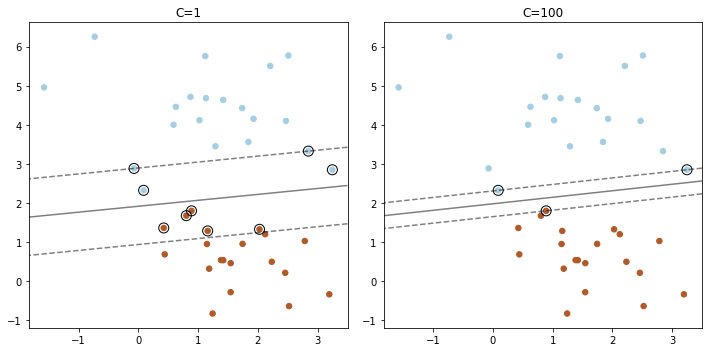

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)
print(X)
print('-----')
print(y)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()